In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Loading and Preprocessing the Video

### Loading the Video

In [2]:
video_path = 'cars.mp4'
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

In [3]:
# Initialize MOG2 Background subtractor
backSub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=True)


### Reading Frames and Preprocessing

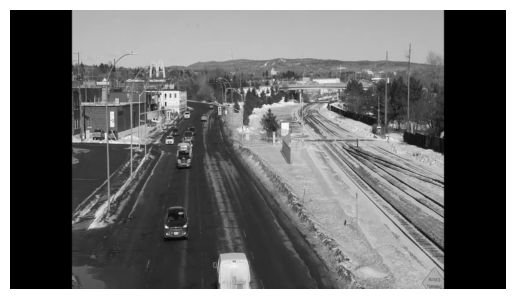

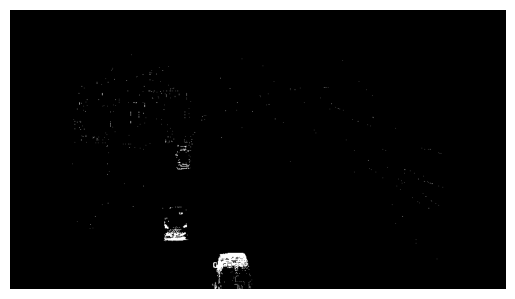

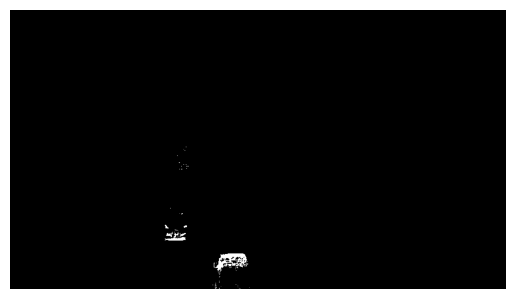

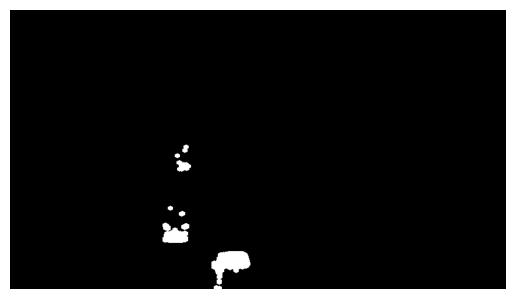

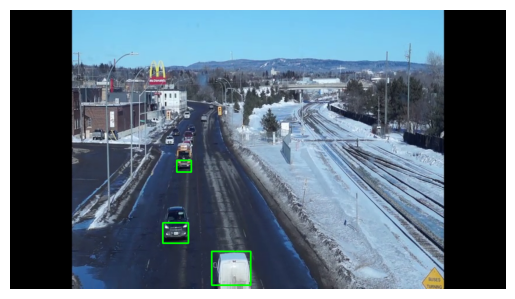

In [27]:
# Display an image
def display_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Read the first frame
ret, frame = cap.read()
kernel_erode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

if ret:
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply background subtraction
    fgMask = backSub.apply(gray_frame)
    fgMask_erode = cv2.erode(fgMask, kernel_erode, iterations=1)
    _, fgMask_shadow_removed = cv2.threshold(fgMask_erode, 127, 255, cv2.THRESH_BINARY)
    fgMask_dilated = cv2.dilate(fgMask_shadow_removed, kernel_dilate, iterations=2)

    # Countour edtection
    contours, _ = cv2.findContours(fgMask_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 200:
            x, y , w, h = cv2.boundingRect(contour)
            aspect_ratio = w / float(h)

            if 0.5 < aspect_ratio < 5:
                cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)

    # Display the frame
    display_image(gray_frame)
    display_image(fgMask)
    display_image(fgMask_erode)
    display_image(fgMask_dilated)
    display_image(frame)
    
    
else:
    print("Error: Could not read frame.")


### Looping through the Video

In [ ]:
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply background subtraction
    fgMask = backSub.apply(gray_frame)

    # Display the grayscale frame 
    display_image(gray_frame)

# Release the video capture object
cap.release()

# 2nd try

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Display an image
def display_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

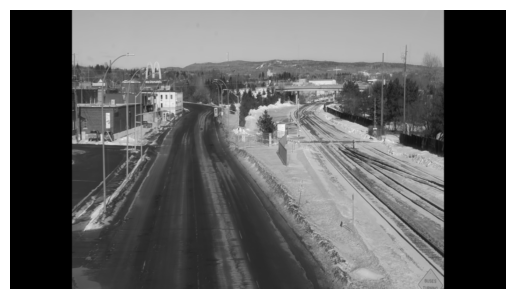

In [10]:
video_path = 'cars.mp4'
cap = cv2.VideoCapture(video_path)

frame_sum = None
frame_number = 600

# Read and extract the frame
for i in range(frame_number):
    ret, frame = cap.read()

    if not ret:
        print(f"Error: Could not read frame {frame_number}.")
        exit()
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
    if frame_sum is None:
        frame_sum = gray_frame
    else:
        frame_sum += gray_frame

averag_background = frame_sum / frame_number
averag_background = np.uint8(averag_background)
display_image(averag_background)

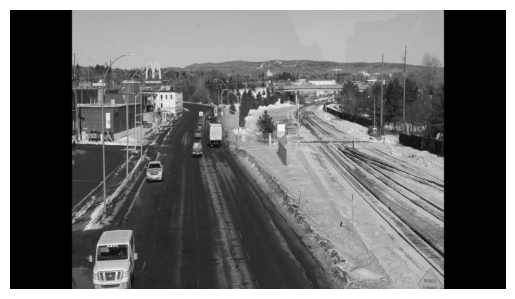

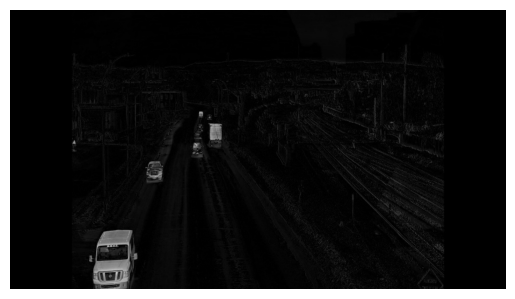

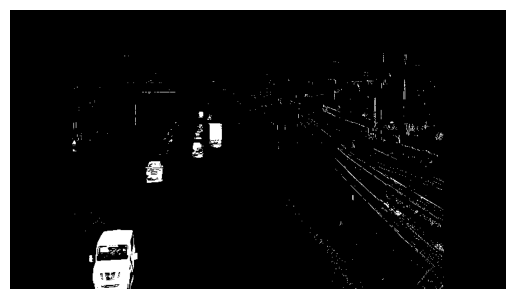

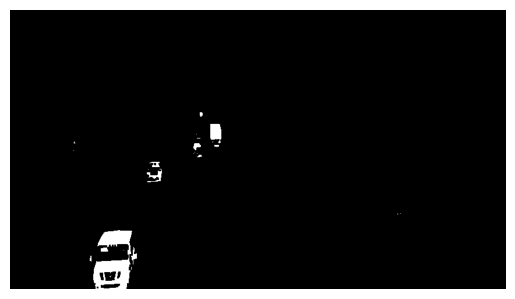

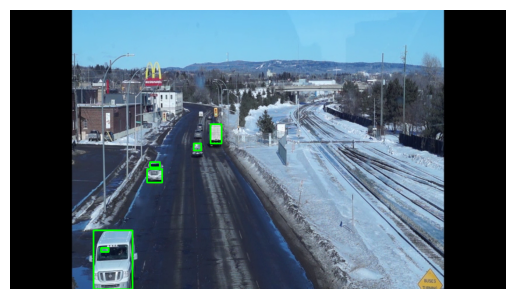

In [18]:
# Read the first frame
ret, frame = cap.read()
kernel_erode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

if ret:
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    frame_delta = cv2.absdiff(gray_frame, averag_background)

    _, threshold = cv2.threshold(frame_delta, 25, 255, cv2.THRESH_BINARY)

    thresh = cv2.erode(threshold, None, iterations=1)

    # Countour edtection
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 55:
            x, y , w, h = cv2.boundingRect(contour)
            aspect_ratio = w / float(h)

            if 0.5 < aspect_ratio < 5:
                cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)

    # Display the frame
    display_image(gray_frame)
    display_image(frame_delta)
    display_image(threshold)
    display_image(thresh)
    display_image(frame)
    
    
else:
    print("Error: Could not read frame.")